# Question 3, work in progress

In [232]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# Set the font globally
matplotlib.rcParams['font.family'] = 'serif'  # e.g., 'sans-serif', 'serif', 'monospace'
matplotlib.rcParams['font.size'] = 12         # Set font size globally
matplotlib.rcParams['mathtext.fontset'] = 'stix'  # For math text consistency with LaTeX
matplotlib.rcParams['font.serif'] = ['Times New Roman']  # Use specific font


# Assumption of no clouds

In [233]:
# SHORT WAVE

P_sol= 341.3
r_SM = 0.1065

a_O3 = 0.08

a_SW = 0.1451

r_SE = 0.17

P_refl_atm = r_SM*P_sol

P_abs_atm = (a_SW+ a_O3)*(1-r_SM)*P_sol

P_trans_atm = (1 - (a_SW + a_O3))*(1- r_SM)*P_sol

P_refl_earth_total = (r_SE*P_trans_atm)/(1-r_SE*r_SM)

P_abs_earth_total = (P_trans_atm)/(1-r_SE*r_SM)

# LONG WAVE

sigma = 5.67*10**(-8) #W m-2 K-4
epsilon_A = 0.875
f_A = 0.618
alpha = 3
beta = 4
a_LW = 0.8258

#P_E0 = sigma*T_E**4
#P_A0 = epsilon_A*sigma*T_A**4
#P_A0_down = f_A*P_A0
#P_A0_up = (1-f_A)*P_A0
#P_EtoA = - alpha*(T_A -T_E)
#P_latent = -beta*(T_A-T_E)

from scipy.optimize import fsolve
def eqns(variables, a_SW_total=(a_O3+a_SW)):
    T_E, T_A = variables

    #P_non_rad = (alpha + beta) * (T_E - T_A)
    #               P_abs_earth   +     P_A0_down    -    (P_EtoA + P_latent)    - P_E0
    #eqn1 = P_abs_earth_total + epsilon_A*sigma* T_A**4 - P_non_rad - sigma* T_E**4
    #     P_abs_atm  +       a_LW*P_E0    +  (P_EtoA + P_latent)     - P_A0
    #eqn2 = (P_refl_earth_total) + a_LW*sigma* T_E**4 + P_non_rad - (1+f_A)*epsilon_A*sigma* T_A**4 - (1 - (a_SW + a_O3))*(1- r_SM)*P_refl_earth_total
    #eqn2 = (a_O3+a_SW)*(1-r_SM)*P_sol + (a_O3 + a_SW)*(r_SE*P_trans_atm)/(1-r_SE*r_SM) + a_LW*sigma* T_E**4 + P_non_rad - (1+f_A)*epsilon_A*sigma* T_A**4 - (1 - (a_SW + a_O3))*(1- r_SM)*P_refl_earth_total
    eqn1 = ((1 - (a_O3+a_SW))*(1- r_SM)*P_sol)/(1-r_SE*r_SM) + epsilon_A*sigma* T_A**4 - (alpha + beta) * (T_E - T_A) - sigma*T_E**4
    eqn2 =  (a_O3 + a_SW)*(1-r_SM)*P_sol + (a_O3+a_SW)*(r_SE*(1 - (a_O3 + a_SW))*(1- r_SM)*P_sol)/(1-r_SE*r_SM)+ a_LW*sigma*T_E**4 + (alpha + beta) * (T_E - T_A) - (1+f_A)*epsilon_A*sigma* T_A**4 #- (1 - (a_SW_total))*(1- r_SM)*P_refl_earth_total

    return [eqn1, eqn2]

T_init_guess = [298.0, 278.0]
solution, info , ier, mesg = fsolve(eqns, T_init_guess, xtol=1e-8, full_output=True)

print("Solution: ", solution)

Solution:  [308.28974919 294.07274809]


In [234]:
solution - 273.15 # Celsius

array([35.13974919, 20.92274809])

# Sensitivity


In [235]:
FIGSIZE = (4, 3)

In [236]:
def eqns(vars, a_SW_total):
    T_E, T_A = vars

    # P_trans_atm = (1 - (a_SW_total))*(1- r_SM)*P
    # P_refl_earth_total = (r_SE*P_trans_atm)/(1-r_SE*r_SM)
    # P_abs_earth_total = (P_trans_atm)/(1-r_SE*r_SM)
    # P_non_rad = (alpha + beta) * (T_E - T_A)
    #eq1 = ((1 - (a_SW_total))*(1- r_SM)*P)/(1-r_SE*r_SM) + epsilon_A*sigma* T_A**4 - (alpha + beta) * (T_E - T_A) - sigma*T_E**4
    #eq2 =  (a_SW_total)*(1-r_SM)*P_sol + (a_SW_total)*(r_SE*(1 - (a_SW_total))*(1- r_SM)*P)/(1-r_SE*r_SM)+ a_LW*sigma*T_E**4 + (alpha + beta) * (T_E - T_A) - (1+f)*epsilon_A*sigma* T_A**4 #- (1 - (a_SW_total))*(1- r_SM)*P_refl_earth_total

    eqn1 = ((1 - (a_SW_total))*(1- r_SM)*P_sol)/(1-r_SE*r_SM) + epsilon_A*sigma* T_A**4 - (alpha + beta) * (T_E - T_A) - sigma*T_E**4
    eqn2 =  (a_SW_total)*(1-r_SM)*P_sol + (a_SW_total)*(r_SE*(1 - (a_SW_total))*(1- r_SM)*P_sol)/(1-r_SE*r_SM)+ a_LW*sigma*T_E**4 + (alpha + beta) * (T_E - T_A) - (1+f_A)*epsilon_A*sigma* T_A**4 #- (1 - (a_SW_total))*(1- r_SM)*P_refl_earth_total


    return [eqn1, eqn2]

a_SW_base_values = np.linspace(0.1, 3.5, 100) * (0.1451+0.08 ) 

T_E_values = []
T_A_values = []

# Initial guess for T_E and T_A
initial_guess = [300, 280]

for a_SW_total in a_SW_base_values:
    try:
        solution = fsolve(eqns, initial_guess, args=(a_SW_total,))
        T_E, T_A = solution
        T_E_values.append(T_E)
        T_A_values.append(T_A)
        initial_guess = solution  # Update the guess
    except Exception as e:
        print(f"Failed to converge at a_SW={a_SW_total}: {e}")
        T_E_values.append(np.nan)
        T_A_values.append(np.nan)

# Compute numerical derivatives
dT_E_da_SW = np.gradient(T_E_values, a_SW_base_values)
dT_A_da_SW = np.gradient(T_A_values, a_SW_base_values)


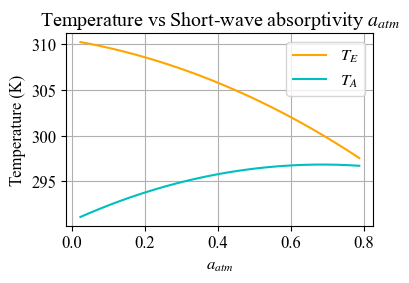

In [237]:

# Plot temperatures vs a_SW
plt.figure(figsize=FIGSIZE)
plt.plot(a_SW_base_values, T_E_values, color = "orange", label=r'$T_E$')
plt.plot(a_SW_base_values, T_A_values, color="c",label=r'$T_A$')
plt.xlabel(r'$a_{atm}$')
plt.ylabel('Temperature (K)')
plt.title(r'Temperature vs Short-wave absorptivity $a_{atm}$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./temperature_absorp.png", dpi=300)

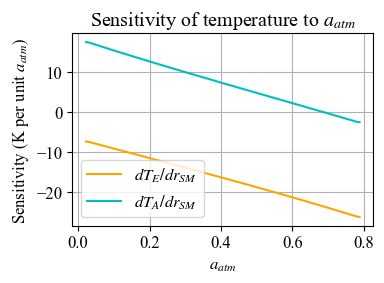

In [238]:

# Plot sensitivities
plt.figure(figsize=FIGSIZE)
plt.plot(a_SW_base_values, dT_E_da_SW, color="orange", label=r'$dT_E/dr_{SM}$')
plt.plot(a_SW_base_values, dT_A_da_SW,  color="c",label=r'$dT_A/dr_{SM}$')
plt.xlabel(r'$a_{atm}$ ')
plt.ylabel(r'Sensitivity (K per unit $a_{atm}$)')
plt.title(r'Sensitivity of temperature to $a_{atm}$')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.savefig("./sensitivity_absorp.png", dpi=300)


In [239]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.misc import derivative

# Constants
sigma = 5.67e-8  # Stefan-Boltzmann constant, W/(m^2·K^4)

# Parameters
P = 341.3        # Average solar flux, W/m^2
epsilon_A = 0.875
alpha = 3        # Sensible heat flux coefficient, W/(m^2·K)
beta = 4         # Latent heat flux coefficient, W/(m^2·K)
a_LW = 0.8258    # Long-wave absorptivity of the atmosphere
f = 0.618        # Asymmetry factor
r_SE = 0.17      # Short-wave Earth reflectivity
#r_SM = 0.1065    # Short-wave molecular scattering coefficient
# Total short-wave absorptivity (including ozone)
a_SW_total = (0.1451+0.08 )
def equations(vars, r_SM):
    T_E, T_A = vars

    # P_trans_atm = (1 - (a_SW_total))*(1- r_SM)*P
    # P_refl_earth_total = (r_SE*P_trans_atm)/(1-r_SE*r_SM)
    # P_abs_earth_total = (P_trans_atm)/(1-r_SE*r_SM)

    # P_non_rad = (alpha + beta) * (T_E - T_A)

    #eq1 = ((1 - (a_SW_total))*(1- r_SM)*P)/(1-r_SE*r_SM) + epsilon_A*sigma* T_A**4 - (alpha + beta) * (T_E - T_A) - sigma*T_E**4
    #eq2 =  (a_SW_total)*(1-r_SM)*P_sol + (a_SW_total)*(r_SE*(1 - (a_SW_total))*(1- r_SM)*P)/(1-r_SE*r_SM)+ a_LW*sigma*T_E**4 + (alpha + beta) * (T_E - T_A) - (1+f)*epsilon_A*sigma* T_A**4 #- (1 - (a_SW_total))*(1- r_SM)*P_refl_earth_total

    eqn1 = ((1 - (a_SW_total))*(1- r_SM)*P_sol)/(1-r_SE*r_SM) + epsilon_A*sigma* T_A**4 - (alpha + beta) * (T_E - T_A) - sigma*T_E**4
    eqn2 =  (a_SW_total)*(1-r_SM)*P_sol + (a_SW_total)*(r_SE*(1 - (a_SW_total))*(1- r_SM)*P_sol)/(1-r_SE*r_SM)+ a_LW*sigma*T_E**4 + (alpha + beta) * (T_E - T_A) - (1+f_A)*epsilon_A*sigma* T_A**4 #- (1 - (a_SW_total))*(1- r_SM)*P_refl_earth_total


    return [eqn1, eqn2]



# Base a_SW (excluding ozone)
r_SM_base_values = np.linspace(0.1, 7, 1000) * (0.1065 ) # Varying the other short-wave absorptivity

# Total a_SW including ozone
#a_SW_values = a_O3 + a_SW_base_values

# Lists to store the results
T_E_values = []
T_A_values = []

# Initial guess for T_E and T_A
initial_guess = [300, 280]

for r_SM in r_SM_base_values:
    try:
        solution = fsolve(equations, initial_guess, args=(r_SM,))
        T_E, T_A = solution
        T_E_values.append(T_E)
        T_A_values.append(T_A)
        initial_guess = solution  # Update the guess
    except Exception as e:
        print(f"Failed to converge at a_SW={a_SW_total}: {e}")
        T_E_values.append(np.nan)
        T_A_values.append(np.nan)

# Compute numerical derivatives
dT_E_dr_SM = np.gradient(T_E_values, r_SM_base_values)
dT_A_dr_SM = np.gradient(T_A_values, r_SM_base_values)


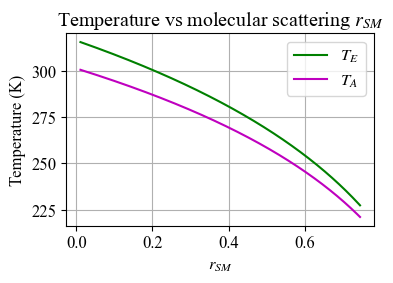

In [240]:

# Plot temperatures vs a_SW
plt.figure(figsize=FIGSIZE)
plt.plot(r_SM_base_values, T_E_values, color="green", label=r'$T_E$')
plt.plot(r_SM_base_values, T_A_values, color="m", label=r'$T_A$')
plt.xlabel(r'$r_{SM}$')
plt.ylabel(r'Temperature (K)')
plt.title(r'Temperature vs molecular scattering $r_{SM}$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./temperature_rSM.png", dpi=300)

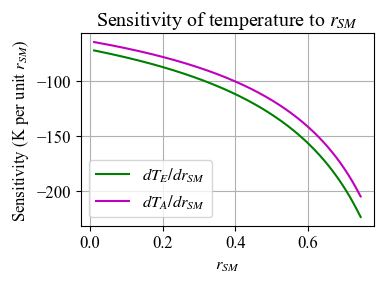

In [241]:

# Plot sensitivities
plt.figure(figsize=FIGSIZE)
plt.plot(r_SM_base_values, dT_E_dr_SM, color="green", label=r'$dT_E/dr_{SM}$')
plt.plot(r_SM_base_values, dT_A_dr_SM, color="m",label=r'$dT_A/dr_{SM}$')
plt.xlabel(r'$r_{SM}$')
plt.ylabel(r'Sensitivity (K per unit $r_{SM}$)')
plt.title(r'Sensitivity of temperature to $r_{SM}$')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.savefig("./sensitivity_rSM.png", dpi=300)

# Assumption with clouds

In [242]:
CC = 0.66
r_SC = 0.22
r_LC = 0.195
a_LC = 0.622
a_SC = 0.1239

                # atm refect    + clouds reflect
P_refl_atm = r_SM*(1-CC)*P_sol + r_SC*CC*P_sol
print(P_refl_atm)
                #
P_abs_atm =  (a_O3 + a_SW)*(1-CC)*(1 -r_SM)*P_sol  + (a_O3 + a_SC)*(1-r_SC)*CC*P_sol
print(P_abs_atm)

P_trans_atm = P_sol - P_refl_atm - P_abs_atm
print(P_trans_atm)

P_refl_earth = r_SE * P_trans_atm
P_abs_earth = (1 - r_SE)*P_trans_atm

a_LW_total = a_LW*(1-CC) + a_LC*CC
epsilon_A_total = epsilon_A*(1-CC) + a_LC*CC

def eqns(variables):
    T_E, T_A = variables

    P_non_rad = - (alpha + beta) * (T_A - T_E)
    #               P_abs_earth   +     P_A0_down    -    (P_EtoA + P_latent)    - P_E0
    eqn1 = P_abs_earth + f_A*epsilon_A_total*sigma* T_A**4 + P_non_rad - sigma* T_E**4

    #     P_abs_atm  +       a_LW*P_E0    +  (P_EtoA + P_latent)     - P_A0
    eqn2 = P_abs_atm + a_LW_total*sigma* T_E**4 - P_non_rad - epsilon_A_total*sigma* T_A**4

    return [eqn1, eqn2]

T_init_guess = [298.0, 288.0]
solution, info , ier, mesg = fsolve(eqns, T_init_guess, xtol=1e-8, full_output=True)

print("Solution: ", solution)



136.066071
42.473291129900005
162.76063787010003
Solution:  [275.57241613 265.86771326]


In [243]:
solution - 273

array([ 2.57241613, -7.13228674])